In [60]:
import sys

sys.path.insert(0, "../")
from tests import utils as test_utils

In [61]:
import weather_model_graphs as wmg
import numpy as np
import matplotlib.pyplot as plt

In [62]:
xy = test_utils.create_fake_irregular_coords(10)
print(xy.shape)
mesh_node_distance = 0.2
# fn = wmg.create.archetype.create_oskarsson_hierarchical_graph
fn = wmg.create.archetype.create_keisler_graph

unfiltered_graph = fn(coords=xy, mesh_node_distance=mesh_node_distance)

2024-12-09 11:14:45.392 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:103 - No `coords_crs` given: Assuming `coords` contains in-projection Cartesian coordinates.


(10, 2)


In [63]:
# Filter every other grid node so that decoding isn't done to these nodes
# decode_mask = np.array(np.arange(xy.shape[0]) % 2 == 0)
# filter the first 5 nodes
decode_mask = np.zeros(xy.shape[0], dtype=bool)
decode_mask[:5] = True
print(decode_mask)
filtered_graph = fn(
    coords=xy, mesh_node_distance=mesh_node_distance, decode_mask=decode_mask
)

2024-12-09 11:14:45.408 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:103 - No `coords_crs` given: Assuming `coords` contains in-projection Cartesian coordinates.


[ True  True  True  True  True False False False False False]


grid-points removed from filter: [5 6 7 8 9]
grid-points kept from filter: [0 1 2 3 4]


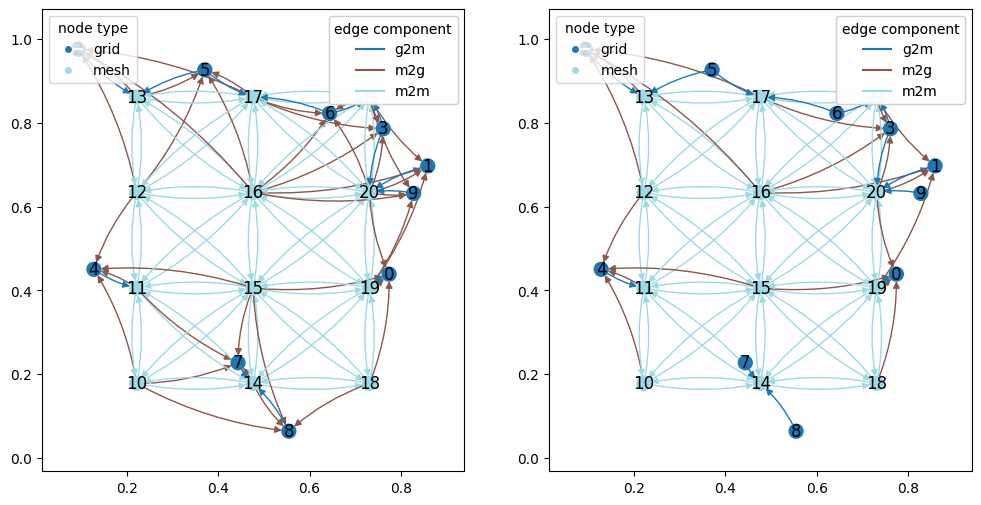

In [64]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

for ax, graph in zip(axes, [unfiltered_graph, filtered_graph]):
    wmg.visualise.nx_draw_with_pos_and_attr(
        graph,
        ax=ax,
        node_color_attr="type",
        edge_color_attr="component",
        with_labels=True,
    )

print(
    "grid-points removed from filter:",
    np.arange(xy.shape[0])[~decode_mask.astype(bool)],
)
print("grid-points kept from filter:", np.arange(xy.shape[0])[decode_mask.astype(bool)])

In [81]:
def save_graph_components(graph, subdir):
    graph_components = wmg.split_graph_by_edge_attribute(graph=graph, attr="component")
    for name, graph_component in graph_components.items():
        print(graph_component.nodes(data=True))
        wmg.save.to_pyg(graph_component, output_directory=subdir, name=name)

In [82]:
# wmg.save.to_pyg(graph=unfiltered_graph, output_directory=".", name="example_keisler_graph")
save_graph_components(unfiltered_graph, "example_keisler_graph_components")

2024-12-09 11:23:42.438 | INFO     | weather_model_graphs.save:to_pyg:150 - Saved edge index to example_keisler_graph_components/m2g_edge_index.pt and features ['len', 'vdiff'] to example_keisler_graph_components/m2g_features.pt.
2024-12-09 11:23:42.450 | INFO     | weather_model_graphs.save:to_pyg:157 - Saved node features ['pos'] to example_keisler_graph_components/m2g_node_features.pt.
2024-12-09 11:23:42.460 | INFO     | weather_model_graphs.save:to_pyg:150 - Saved edge index to example_keisler_graph_components/m2m_edge_index.pt and features ['len', 'vdiff'] to example_keisler_graph_components/m2m_features.pt.
2024-12-09 11:23:42.460 | INFO     | weather_model_graphs.save:to_pyg:157 - Saved node features ['pos'] to example_keisler_graph_components/m2m_node_features.pt.
2024-12-09 11:23:42.463 | INFO     | weather_model_graphs.save:to_pyg:150 - Saved edge index to example_keisler_graph_components/g2m_edge_index.pt and features ['len', 'vdiff'] to example_keisler_graph_components/g2m

[(10, {'pos': array([0.22158078, 0.17779289]), 'type': 'mesh'}), (11, {'pos': array([0.22158078, 0.40574417]), 'type': 'mesh'}), (12, {'pos': array([0.22158078, 0.63369544]), 'type': 'mesh'}), (13, {'pos': array([0.22158078, 0.86164671]), 'type': 'mesh'}), (14, {'pos': array([0.47638763, 0.17779289]), 'type': 'mesh'}), (15, {'pos': array([0.47638763, 0.40574417]), 'type': 'mesh'}), (16, {'pos': array([0.47638763, 0.63369544]), 'type': 'mesh'}), (17, {'pos': array([0.47638763, 0.86164671]), 'type': 'mesh'}), (18, {'pos': array([0.73119449, 0.17779289]), 'type': 'mesh'}), (19, {'pos': array([0.73119449, 0.40574417]), 'type': 'mesh'}), (20, {'pos': array([0.73119449, 0.63369544]), 'type': 'mesh'}), (21, {'pos': array([0.73119449, 0.86164671]), 'type': 'mesh'}), (0, {'pos': array([0.77395605, 0.43887844]), 'level': -1, 'type': 'grid'}), (1, {'pos': array([0.85859792, 0.69736803]), 'level': -1, 'type': 'grid'}), (2, {'pos': array([0.09417735, 0.97562235]), 'level': -1, 'type': 'grid'}), (3,

In [67]:
# wmg.save.to_pyg(graph=filtered_graph, output_directory=".", name="example_keisler_graph_filtered")
save_graph_components(filtered_graph, "example_keisler_graph_filtered_components")

2024-12-09 11:14:45.877 | INFO     | weather_model_graphs.save:to_pyg:150 - Saved edge index to example_keisler_graph_filtered_components/m2g_edge_index.pt and features ['len', 'vdiff'] to example_keisler_graph_filtered_components/m2g_features.pt.
2024-12-09 11:14:45.877 | INFO     | weather_model_graphs.save:to_pyg:157 - Saved node features ['pos'] to example_keisler_graph_filtered_components/m2g_node_features.pt.
2024-12-09 11:14:45.879 | INFO     | weather_model_graphs.save:to_pyg:150 - Saved edge index to example_keisler_graph_filtered_components/m2m_edge_index.pt and features ['len', 'vdiff'] to example_keisler_graph_filtered_components/m2m_features.pt.
2024-12-09 11:14:45.880 | INFO     | weather_model_graphs.save:to_pyg:157 - Saved node features ['pos'] to example_keisler_graph_filtered_components/m2m_node_features.pt.
2024-12-09 11:14:45.881 | INFO     | weather_model_graphs.save:to_pyg:150 - Saved edge index to example_keisler_graph_filtered_components/g2m_edge_index.pt and fe

In [68]:
def load_adjecency_matrix(graph_name, subdir):
    import torch
    from torch_geometric.data import Data
    from torch_geometric.utils import from_networkx

    # example_keisler_graph_filtered_edge_index.pt
    fp = f"{subdir}/{graph_name}_edge_index.pt"

    edge_index = torch.load(fp)

    print(f"Loaded adjacency matrix from {fp}, shape: {edge_index.shape}")

    return edge_index.numpy()

In [69]:
adj_filtered = load_adjecency_matrix("m2g", "example_keisler_graph_filtered_components")
adj_unfiltered = load_adjecency_matrix("m2g", "example_keisler_graph_components")

Loaded adjacency matrix from example_keisler_graph_filtered_components/m2g_edge_index.pt, shape: torch.Size([2, 20])
Loaded adjacency matrix from example_keisler_graph_components/m2g_edge_index.pt, shape: torch.Size([2, 40])


In [70]:
adj_filtered.shape

(2, 20)

In [71]:
decode_mask

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [72]:
grid_indexes_to_remove = np.arange(0, xy.shape[0])[decode_mask == 0]
print(grid_indexes_to_remove)
grid_indexes_to_remove

adj_pairs = []
for i in range(adj_unfiltered.shape[1]):
    m_idx, g_idx = adj_unfiltered[:, i]
    if g_idx in grid_indexes_to_remove:
        continue
    adj_pairs.append((m_idx, g_idx))

adj_unfiltered_masked = np.array(adj_pairs).T
adj_unfiltered_masked

[5 6 7 8 9]


array([[10, 11, 12, 12, 13, 15, 15, 16, 16, 16, 17, 17, 18, 19, 19, 20,
        20, 20, 21, 21],
       [ 4,  4,  2,  4,  2,  0,  4,  1,  2,  3,  2,  3,  0,  0,  1,  0,
         1,  3,  1,  3]])

In [73]:
np.all(adj_filtered == adj_unfiltered_masked)

False

In [79]:
set(zip(*adj_filtered))

{(5, 4),
 (6, 4),
 (7, 2),
 (7, 4),
 (8, 2),
 (9, 0),
 (9, 4),
 (10, 1),
 (10, 2),
 (10, 3),
 (11, 2),
 (11, 3),
 (12, 0),
 (13, 0),
 (13, 1),
 (14, 0),
 (14, 1),
 (14, 3),
 (15, 1),
 (15, 3)}

In [80]:
set(zip(*adj_unfiltered_masked))

{(10, 4),
 (11, 4),
 (12, 2),
 (12, 4),
 (13, 2),
 (15, 0),
 (15, 4),
 (16, 1),
 (16, 2),
 (16, 3),
 (17, 2),
 (17, 3),
 (18, 0),
 (19, 0),
 (19, 1),
 (20, 0),
 (20, 1),
 (20, 3),
 (21, 1),
 (21, 3)}

In [74]:
graph_edges_unfiltered = np.array(unfiltered_graph.edges)
assert set(zip(*graph_edges_unfiltered.T)) == set(zip(*adj_unfiltered))
graph_edges_filtered = np.array(filtered_graph.edges)
assert set(zip(*graph_edges_filtered.T)) == set(zip(*adj_filtered))

AssertionError: 